<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy as np
import seaborn


In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [32]:
import six
def convert_to_int(row):
    try:
        return int(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return int(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)

# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

In [171]:
# ¿Qué hacemos con los datos faltantes? -> Limpiamos los datos faltantes en el analisis temporal
# Mostramos el dataset para ver su forma

dataset.dropna(subset=['year'])
dataset.head()

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16,year
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN,2017.0
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN,2017.0
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN,2017.0
3,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaría,NaN,"Mala alimentación, Malas condiciones de alojam...",NaN,Alejamiento de vínculos,NaN,NaN,NaN,Policia Provincial,Comisaria Nº 3 de Rafael Castillo,NaN,2017.0
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN,2017.0


## Distribucion por temporal por frecuencia ( approach dudoso )

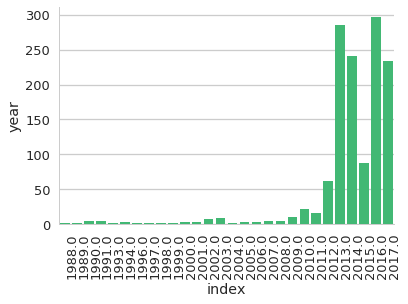

In [8]:
fdps = dataset.year.value_counts()

ax = seaborn.barplot(data=fdps.to_frame().reset_index(), x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left") # 90 because visibility
seaborn.despine()

## Distribucion por temporal por frecuencia 'normalizada'
Aunque como es de esperarse tiene la misma 'forma' pero con valores normalizados por la herramienta

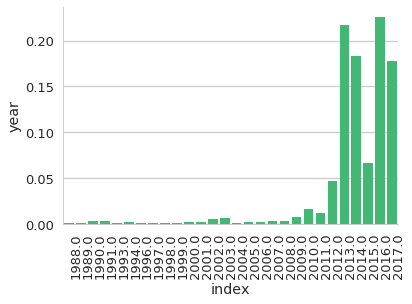

In [9]:
dataset.dropna(subset=['year'])
fdps = dataset.year.value_counts(normalize=True)

ax = seaborn.barplot(data=fdps.to_frame().reset_index(), x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
seaborn.despine()

## Gráfico de frecuencia acumulada 
SI realizado por fuerza bruta .....

In [175]:
dataset.dropna(subset=['year'])
fdps = dataset.year.value_counts(normalize=True)

dataframe = fdps.sort_index().reset_index()

acc = 0   
values = list()
for index, row in dataframe.iterrows():
    acc += row['year']
    values.append([row['index'], acc])


df = pandas.DataFrame(
values,
index=[ index for index, row in dataframe.iterrows()],
columns=['index','accumulated']
)

#print( df )
#print( dataframe )

acc = 0 
for index, row in dataframe.iterrows():
    acc += row['year']
    dataframe.loc[index]['accumulated'] = acc

finaldf = pandas.merge( dataframe , df, how='inner')
finaldf.head()


,index,year,accumulated
0,1988.0,0.000760,0.000760
1,1989.0,0.000760,0.001520
2,1990.0,0.003799,0.005319
3,1991.0,0.003799,0.009119
4,1993.0,0.001520,0.010638


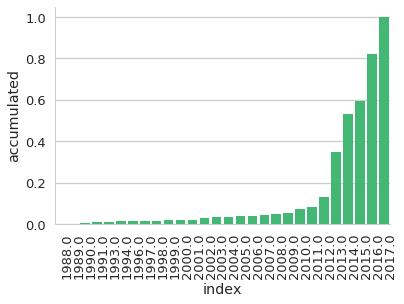

In [282]:
ax = seaborn.barplot(data=finaldf, x='index', y='accumulated', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
seaborn.despine()

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [12]:
# If not avaible both dataset just evaluate on both availables
provincias_df = dataset.dropna(subset=['provincia','year'])
provincias_df.provincia.unique()

array(['Buenos Aires', 'Santiago del Estero', 'Ciudad de Buenos Aires',
       'Chubut', 'Córdoba', 'Misiones', 'Santa Fe', 'San Luis',
       'La Pampa', 'Salta', 'Rio Negro', 'Chaco', 'Formosa', 'Neuquen',
       'Corrientes', 'Jujuy', 'Santa Cruz', 'Mendoza', 'Tierra del Fuego',
       'Entre Rios', 'La Rioja', 'Tucuman', 'Catamarca', 'San Juan'],
      dtype=object)

### Contruccion de la tabla normalizada ...
** pero sin tener en cuenta la densidad poblacional de dichos grupos urbanos **
y donde se ve la distorsion que genera la polarizacion de la poblacion en algunas provincias

In [144]:
provincias_ds = provincias_df.provincia.value_counts(normalize=True)
# Watching as a table
provincias_ds.to_frame().reset_index()#.head()

,index,provincia
0,Buenos Aires,0.685057
1,Ciudad de Buenos Aires,0.085824
2,Córdoba,0.039847
3,Chubut,0.026054
4,Chaco,0.022222
5,Rio Negro,0.019157
6,Neuquen,0.014559
7,Santa Fe,0.014559
8,Mendoza,0.012261
9,Salta,0.012261


### Graficamente...

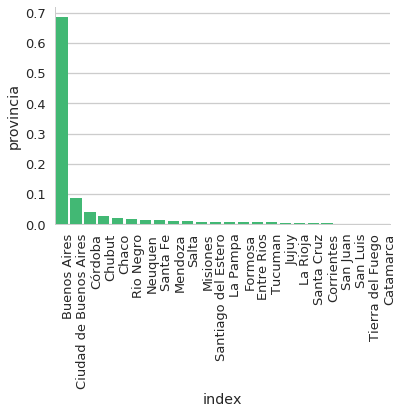

In [14]:
bx = seaborn.barplot(data=provincias_ds.to_frame().reset_index(), x='index', y='provincia', color='#2ecc71')
bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="left")
seaborn.despine()

In [176]:
df2 = provincias_df.groupby(['year','provincia'])['year'].count().unstack('provincia').fillna(0)
#df2.head()

### Realizar un grafico de barras tampoco ayuda a resolver el problema

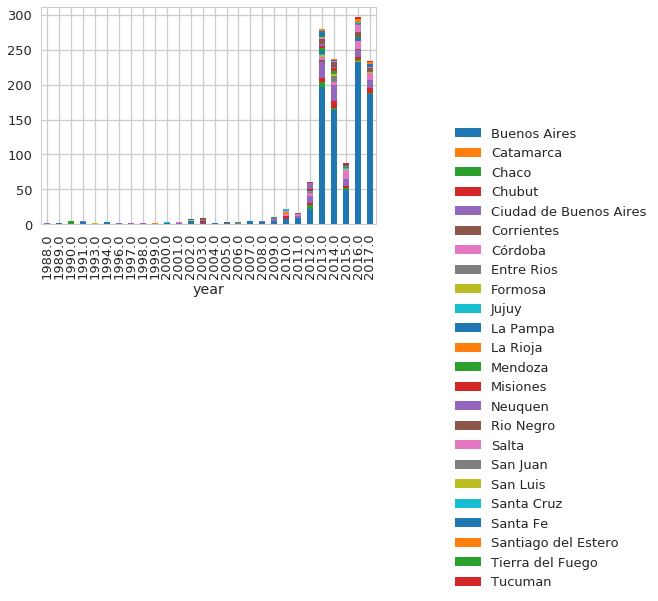

In [177]:
# Look horrible
ax = df2.plot(kind='bar', stacked=True, legend=False).legend(bbox_to_anchor=(1.2, 0.5))

### Incluso contar con una evolucion temporal de los casos
se ve distorsionado por el fenomeno...

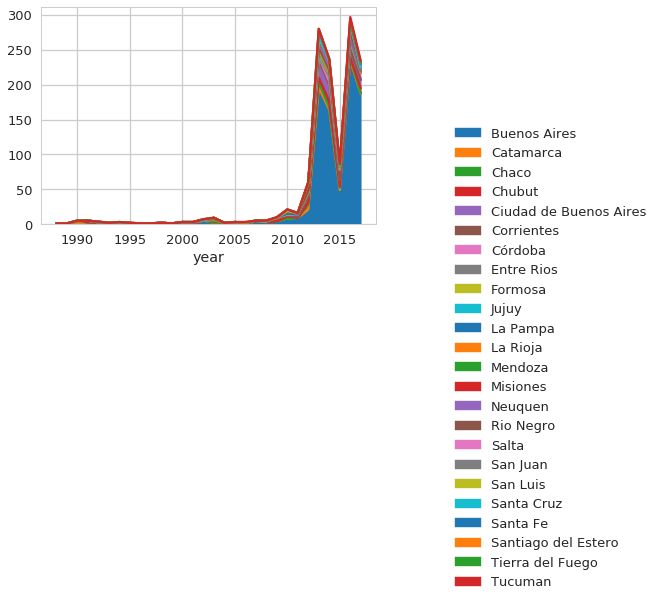

In [77]:
df2.plot.area().legend(bbox_to_anchor=(1.2, 0.5))

### Normalizamos el efecto teniendo en cuenta la densidad poblacional de cada provincia...

Aqui ya podemos apreciar existe otra distribucion de los datos teniendo en cuenta los valores reasignados

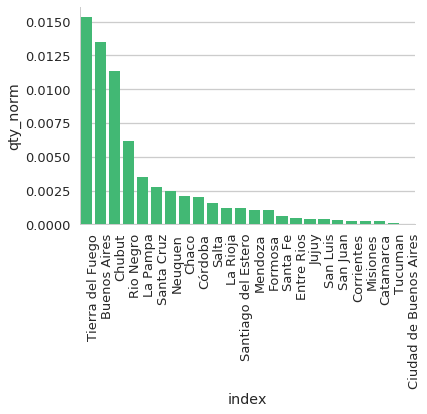

In [185]:

def convert_to_prov(row):
# Densidad poblacional acorde a https://www.sig.indec.gov.ar/censo2010/    
    provincesmap = {
        'Buenos Aires': 50.8,
        'Catamarca': 3.6,
        'Chaco': 10.6,
        'Chubut': 2.3,
        'Ciudad de Buenos Aires': 14450.8,
        'Córdoba': 20,
        'Corrientes': 11.3,
        'Entre Rios': 15.7,
        'Formosa': 7.4,
        'Jujuy': 12.7,
        'La Pampa': 2.2,
        'La Rioja': 3.7,
        'Mendoza': 11.7,
        'Misiones': 37,
        'Neuquen': 5.9,
        'Rio Negro': 3.1,
        'Salta': 7.8,
        'San Juan': 7.6,
        'San Luis': 5.6,
        'Santa Cruz': 1.1,
        'Santa Fe': 24,
        'Santiago del Estero': 6.4,
        'Tierra del Fuego': 0.1,
        'Tucuman': 64.3
    }
    
    return provincesmap[row]

#demo = provincias_df[['year','provincia']]# processes secuentially but is not valueable
demo = provincias_df.loc[:,('year','provincia')] # new dataframe with values of columns
#Initialize a new column with 1 as a value
demo.loc[:,'qty_evts'] = 1 # Initialize data column at 1
# print out value to check
provincias_ds = demo.provincia.value_counts(normalize = True)
provincias_ds = provincias_ds.reset_index()
# Obscure magic here....
provincias_ds.loc[:,'qty_norm'] = provincias_ds.provincia / provincias_ds['index'].apply(convert_to_prov)
# Sorting values according to most affected ones
provincias_ds = provincias_ds.sort_values(by=['qty_norm'], ascending=False)

# And finally plot values 
bx = seaborn.barplot(data=provincias_ds, x='index', y='qty_norm', color='#2ecc71')
bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="left")
seaborn.despine()


#### Agregamos una visualizacion temporal segun convenga....

In [158]:
group_data = demo.groupby(['year','provincia']).sum()[['qty_evts']].reset_index()
group_data.loc[:,'qty_norm'] = group_data.qty_evts / group_data.provincia.apply(convert_to_prov)
#group_data.sort_values(by=['year','qty_norm','provincia','qty_evts'], ascending=[1,0,0,0])
#adf = provincias_df.groupby(['year','provincia'])['year'].count().unstack('provincia').fillna(0)
group_data.head()

,year,provincia,qty_evts,qty_norm
0,1988.0,Ciudad de Buenos Aires,1,0.000069
1,1989.0,Buenos Aires,1,0.019685
2,1990.0,Chaco,4,0.377358
3,1990.0,Mendoza,1,0.085470
4,1991.0,Buenos Aires,3,0.059055


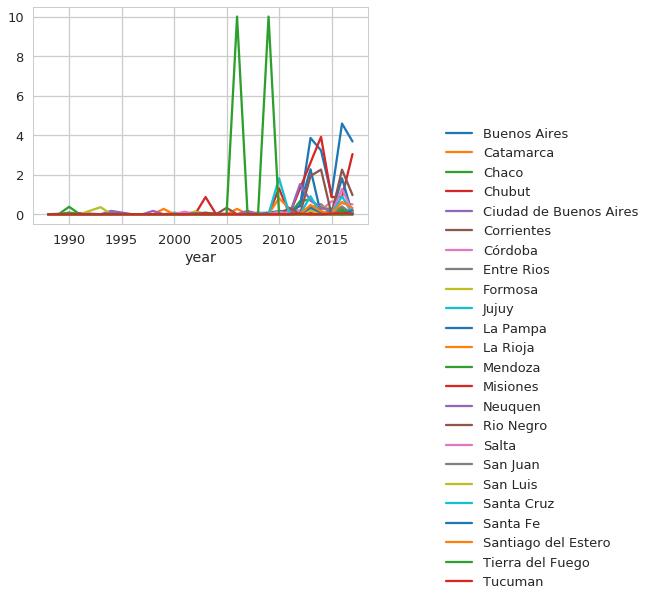

In [142]:
df_series = group_data.pivot(index='year', columns='provincia', values='qty_norm').fillna(0).astype(float)
df_series.plot().legend(bbox_to_anchor=(1.2, 0.5))


### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [194]:
# List all unique context
contexto = dataset.dropna(subset=[ 'contexto1' ])
contexto.contexto1.unique()

array(['Penal / Complejo Penitenciario PROVINCIAL', 'Comisaría',
       'Penal / Complejo Penitenciario FEDERAL', 'Espacio Público',
       'Instalaciones de la Gendarmería Nacional', 'Domicilio Particular',
       'Hospital General',
       'Centros de Detención Previos al Juicio (Alcaidia)',
       'Lugar No Identificado',
       'Móviles y medios de transporte de Fuerzas de Seguridad',
       'Centros de Alojamiento para Personas Menores de Edad',
       'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)',
       'Escuelas de Formación Fuerzas Nacionales',
       'Establecimiento de Salud Mental',
       'Escuelas de Formación Fuerzas Provinciales',
       'Establecimiento de Rehabilitación de Adicciones',
       'Centros de Detención Preventiva'], dtype=object)

### En base a los posibles valores clasificamos `dependencia de una fuerza de seguridad` con "✓"
- **Penal / Complejo Penitenciario PROVINCIAL**, **Comisaría** ✓
- **Penal / Complejo Penitenciario FEDERAL**, **Espacio Público** ✓
- **Móviles y medios de transporte de Fuerzas de Seguridad** ✓
- **Lugar No Identificado** ❌
- **Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)** ✓
- **Instalaciones de la Gendarmería Nacional**, **Domicilio Particular** ✓
- **Hospital General** ❌
- **Establecimiento de Salud Mental** ❌
- **Establecimiento de Rehabilitación de Adicciones** ❌
- **Escuelas de Formación Fuerzas Provinciales** ✓
- **Escuelas de Formación Fuerzas Nacionales** ✓
- **Centros de Detención Previos al Juicio (Alcaidia)** ✓
- **Centros de Detención Preventiva** ✓
- **Centros de Alojamiento para Personas Menores de Edad** ✓

In [231]:
def map_as_security_force(value):
    security_forces = (
      'Penal / Complejo Penitenciario PROVINCIAL', 
      'Penal / Complejo Penitenciario FEDERAL', 
      'Móviles y medios de transporte de Fuerzas de Seguridad',
      'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)',
      'Instalaciones de la Gendarmería Nacional', 
      'Escuelas de Formación Fuerzas Provinciales',
      'Escuelas de Formación Fuerzas Nacionales',
      'Comisaría',
      'Centros de Detención Previos al Juicio (Alcaidia)',
      'Centros de Detención Preventiva'
      'Centros de Alojamiento para Personas Menores de Edad',
    )    
    return 'Fza Seguridad' if value in security_forces else 'Otros'

dependencias = contexto.loc[:,('contexto1')].to_frame() # new dataframe with values of columns
dependencias.loc[:,'sec_force'] = dependencias.contexto1.apply(map_as_security_force)
sec_force_dist=dependencias.sec_force.value_counts(normalize=True).reset_index()

#### Por tanto la probabilidad sera:  
$$80,6498 \% $$

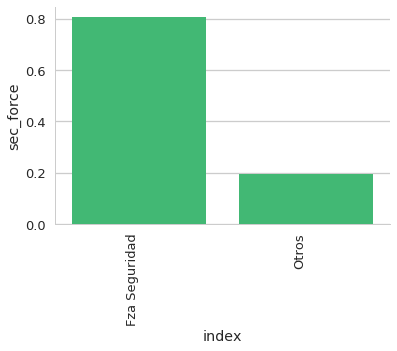

In [232]:
# Graphics ...
bx = seaborn.barplot(data=sec_force_dist, x='index', y='sec_force', color='#2ecc71')
bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha='right')
seaborn.despine()

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [252]:
violencia =  dataset.loc[:,('violencia_fisica','violencia_psiquica')]
violencia.loc[:,'psiquica'] = violencia['violencia_psiquica'].notnull()
violencia.loc[:,'fisica'] = violencia['violencia_fisica'].notnull()


violencia.head()

,violencia_fisica,violencia_psiquica,psiquica,fisica
0,NaN,NaN,False,False
1,NaN,NaN,False,False
2,NaN,NaN,False,False
3,NaN,Alejamiento de vínculos,True,False
4,Golpes,NaN,False,True


In [253]:
#Una vez mapeados los valores podemos empezar a jugar con los valores
violencia = violencia.drop(columns=['violencia_fisica','violencia_psiquica'])
violencia.head()

,psiquica,fisica
0,False,False
1,False,False
2,False,False
3,True,False
4,False,True


In [281]:
# M = ‘existió violencia fisica’
M = violencia.fisica.value_counts(normalize=True).reset_index()['fisica'][1]
print(M)
violencia.fisica.value_counts(normalize=True).reset_index()

0.4100069492703266


,index,fisica
0,False,0.589993
1,True,0.410007


In [280]:
# N = ‘existió violencia psíquica’
N = violencia.psiquica.value_counts(normalize=True).reset_index()['psiquica'][1]
print(N)
violencia.psiquica.value_counts(normalize=True).reset_index()

0.33842946490618486


,index,psiquica
0,False,0.661571
1,True,0.338429


In [268]:
both=len(violencia.query('fisica == True & psiquica == True').index) / len(violencia.index)
both

0.08756080611535788

$$P(M~~|~~N) = ( P(N~~|~~M) · P(M) ) /  P(N)$$
Violencia Psiquica: $$P(N) = 0.338429 $$
Violencia Fisica:   $$P(M) = 0.410007 $$
Violencia Psiquica y Fisica: $$P(N~~|~~M) = 0.08756080611535788 $$

In [278]:
( both * M ) / N

0.10607982671059785

Dos sucesos son independientes si la probabilidad de que ocurran ambos simultáneamente es igual al producto de las probabilidades de que ocurra cada uno de ellos:
$$P(A ∩ B) = P(A)· P(B)$$

$$P(A ∩ B) = 0.08756080611535788$$ y
$$ P(A)· P(B) = 0.4100069492703266 * 0.33842946490618486 = 0.13875843244937391$$ 

Por lo que podemos inferir no son independientes

In [282]:
N * M

0.13875843244937391